In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
classify_email = pd.read_csv('Spam Email raw text for NLP.csv')

### Exploratory Data Analysis

In [ ]:
classify_email.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [ ]:
classify_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [ ]:
# Selecting only 'CATEGORY' and 'MESSAGE' columns
classify_email = classify_email.loc[:, ['CATEGORY', 'MESSAGE']]


In [ ]:
classify_email.head()

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...


In [ ]:
unique_labels = classify_email['CATEGORY'].value_counts()

In [ ]:
unique_labels

CATEGORY
0    3900
1    1896
Name: count, dtype: int64

In [ ]:
# checking balance in label column
label_class_balance = classify_email['CATEGORY'].value_counts(normalize=True) * 100
print("Class balance for label column:")
print(label_class_balance)

Class balance for label column:
CATEGORY
0    67.287785
1    32.712215
Name: proportion, dtype: float64


In [ ]:
# concatenate text data into a single string
text_concatenated = ' '.join(classify_email['MESSAGE'].dropna())

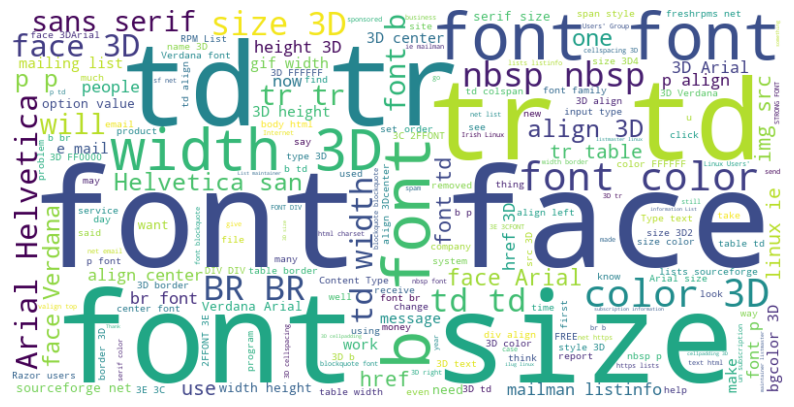

In [ ]:

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_concatenated)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Calculate text lengths (number of characters/words)
text_lengths = classify_email['MESSAGE'].str.len()

C:\Users\754179\AppData\Local\Temp\ipykernel_16980\945835552.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


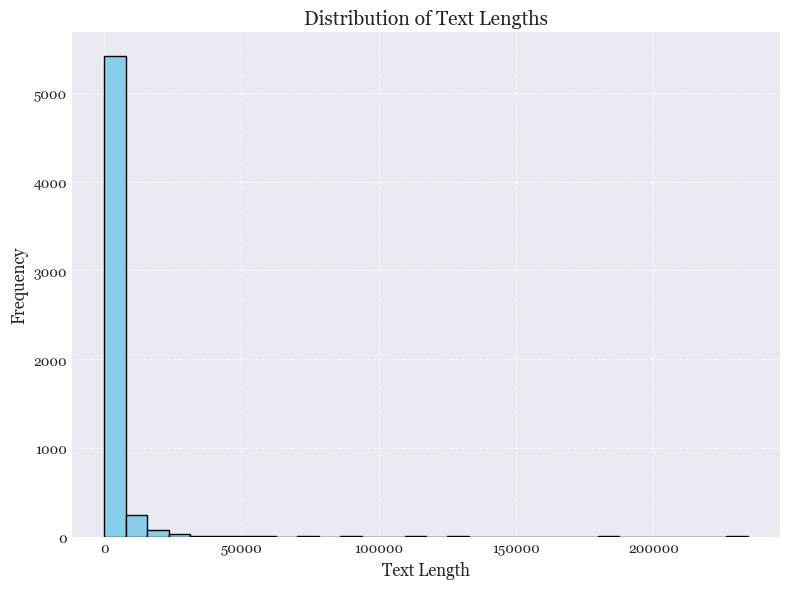

In [ ]:
import matplotlib.pyplot as plt

# Set the plot style and font
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Georgia'

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths', fontsize=14)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
classify_email['MESSAGE'][1001]

'------=_NextPart_000_00B0_35C58D0E.D7267B06\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQo8Ym9keT4NCjxmb250IGNvbG9yPSJmZmZmZmYiPm1hcnRpbmV6\n\nPC9mb250Pg0KPHA+WW91ciBob21lIHJlZmluYW5jZSBsb2FuIGlzIGFwcHJv\n\ndmVkITxicj48L3A+PGJyPg0KPHA+VG8gZ2V0IHlvdXIgYXBwcm92ZWQgYW1v\n\ndW50IDxhIGhyZWY9Imh0dHA6Ly8yMDAuMzIuMy4xMjEvaW5kZXguaHRtIj5n\n\nbw0KaGVyZTwvYT4uPC9wPg0KPGJyPjxicj48YnI+PGJyPjxicj48YnI+PGJy\n\nPjxicj48YnI+PGJyPjxicj48YnI+PGJyPjxicj48YnI+PGJyPjxicj48YnI+\n\nPGJyPg0KPHA+VG8gYmUgZXhjbHVkZWQgZnJvbSBmdXJ0aGVyIG5vdGljZXMg\n\nPGEgaHJlZj0iaHR0cDovLzIwMC4zMi4zLjEyMS9yZW1vdmUuaHRtbCI+Z28N\n\nCmhlcmU8L2E+LjwvcD4NCjxmb250IGNvbG9yPSJmZmZmZmYiPm1hcnRpbmV6\n\nPC9mb250Pg0KPC9ib2R5Pg0KPGZvbnQgY29sb3I9ImZmZmZmZiI+MWdhdGUN\n\nCjwvaHRtbD4NCjA0NTRZdlFEOC00NjdCWllDMjYyMHhIemc2LTk2bDI3\n\n\n'

In [ ]:
classify_email['MESSAGE'][2001]

"URL: http://diveintomark.org/archives/2002/10/03.html#css_and_mobile_devices\n\nDate: 2002-10-03T14:52:57-05:00\n\n\n\nSo, d'ya remember that whole CSS debate that flared up about six months ago? \n\n(Actually, it flares up continuously in various circles. In fact, I think it's \n\nabout time for it to flare up again in weblogging circles. These things are \n\ninexorably cyclical. CSS-vs-tables is the hemorrhoid of the web design world. \n\nBut I digress.) \n\n\n\nIf you were around back then, you will no doubt recall that I was in the \n\npro-CSS camp[1]. \n\n\n\nSo anyway, d'ya remember that argument that went something like &#8220;you \n\nshould design with web standards and CSS because it will future-proof your site \n\nfor the pie-in-the-sky future when people surf the web on mobile \n\ndevices&#8221;? Well, it's crap[2]. \n\n\n\nThere are lots of good arguments for designing with web standards and CSS: \n\nautomatically print-friendly pages[3], dynamic style switchers[4], reduce

### Data preprocessing

In [ ]:
import re

##### Removing punctuations/specil characters

In [ ]:
# Define a function to remove punctuation, special characters

def clean_text(text):
    # Define the pattern for punctuation and special characters
    pattern = r'[,.;!?()"\'&$>=_/...%+<\-]'
    # Replace the pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    # Remove consecutive newline characters
    cleaned_text = re.sub(r'\n+', '\n', cleaned_text)
    # Remove '\n]\n]'
    cleaned_text = cleaned_text.replace('\n]\n]', '')
    return cleaned_text



In [ ]:

# Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(clean_text)

In [ ]:
classify_email['MESSAGE'][1001]

'NextPart00000B035C58D0ED7267B06\nContentType: texthtml charsetiso88591\nContentTransferEncoding: base64\nPGh0bWwDQo8Ym9keT4NCjxmb250IGNvbG9yPSJmZmZmZmYiPm1hcnRpbmV6\nPC9mb250Pg0KPHAWW91ciBob21lIHJlZmluYW5jZSBsb2FuIGlzIGFwcHJv\ndmVkITxicj48L3APGJyPg0KPHAVG8gZ2V0IHlvdXIgYXBwcm92ZWQgYW1v\ndW50IDxhIGhyZWY9Imh0dHA6Ly8yMDAuMzIuMy4xMjEvaW5kZXguaHRtIj5n\nbw0KaGVyZTwvYT4uPC9wPg0KPGJyPjxicj48YnIPGJyPjxicj48YnIPGJy\nPjxicj48YnIPGJyPjxicj48YnIPGJyPjxicj48YnIPGJyPjxicj48YnI\nPGJyPg0KPHAVG8gYmUgZXhjbHVkZWQgZnJvbSBmdXJ0aGVyIG5vdGljZXMg\nPGEgaHJlZj0iaHR0cDovLzIwMC4zMi4zLjEyMS9yZW1vdmUuaHRtbCIZ28N\nCmhlcmU8L2ELjwvcD4NCjxmb250IGNvbG9yPSJmZmZmZmYiPm1hcnRpbmV6\nPC9mb250Pg0KPC9ib2R5Pg0KPGZvbnQgY29sb3I9ImZmZmZmZiIMWdhdGUN\nCjwvaHRtbD4NCjA0NTRZdlFEOC00NjdCWllDMjYyMHhIemc2LTk2bDI3\n'

In [ ]:
classify_email['MESSAGE'][2800]

'On Sun 8 Sep 2002 Eugen Leitl wrote:\n]doesnt look particularly difficult to doClearly this is not something what hets do prostitution not taken into\n]account\nSo lets see hets dont go to swing clubs meat markets or the like at all\nHmm And being gay means hanging in the bath house being a cum dumpster\nwhile you listen to the Devine Ms M belt one out for the boys\nUgh with thinking like this who needs the bible belt\n'

##### Converting all letters to lower case

In [ ]:
# Convert 'MESSAGE' column to lowercase
classify_email['MESSAGE'] = classify_email['MESSAGE'].str.lower()

In [ ]:
classify_email['MESSAGE'][2800]

'on sun 8 sep 2002 eugen leitl wrote:\n]doesnt look particularly difficult to doclearly this is not something what hets do prostitution not taken into\n]account\nso lets see hets dont go to swing clubs meat markets or the like at all\nhmm and being gay means hanging in the bath house being a cum dumpster\nwhile you listen to the devine ms m belt one out for the boys\nugh with thinking like this who needs the bible belt\n'

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")


In [ ]:
!pip install pydantic

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import spacy

# Load the 'en_core_web_sm' model
nlp = spacy.load("en_core_web_sm")


##### Removing stopwords

In [ ]:
# Function to remove stopwords from text
def remove_stopwords(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Filter out tokens that are not stopwords
    filtered_text = " ".join([token.text for token in doc if not token.is_stop])
    return filtered_text

In [ ]:
 #Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(remove_stopwords)

##### Applying lemmatization

In [ ]:
# Function to lemmatize a text
def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Lemmatize each token in the document and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text


In [ ]:
# Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(lemmatize_text)

In [ ]:
classify_email['MESSAGE'][2004]

'article nytimescom \n  send khare@alumnicaltechedu \n  excellent evidence herd imagine anonymous noise inject world newsphere noosphere fraudulent story stock accounting scandal accuse evildoer short \n  oh wait happen unemployed orange county student take emulex \n  enjoy \n    rohit \n  khare@alumnicaltechedu \n  stop press blond survive \n  october 2 2002 \n  lawrence k altman \n \n  apparently fall category good check \n  friday british newspaper report \n  world health organization find study blond \n  extinct 200 year blondness \n  cause recessive gene die \n  report repeat friday anchor abc news \n  program good morning america saturday cnn \n  problem health organization say \n  statement yesterday report blond \n  extinct study \n  subject \n  knowledge news report \n  originate say organization agency united \n  nation base geneva like stress \n  opinion future existence blond \n  news report britain united states \n  cite study world health organization   \n  blondeshell st

### Vectorization

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Assigning X,y to appropriate columns
X = classify_email['MESSAGE']
y = classify_email['CATEGORY']

In [ ]:
# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### Class balancing

In [ ]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Create SMOTE object
smote = SMOTE(random_state=42)

In [ ]:
# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)


In [ ]:
import numpy as np

# Check class distribution in y_resampled
class_distribution = np.unique(y_resampled, return_counts=True)
print("Class distribution in y_resampled:")
for class_label, count in zip(class_distribution[0], class_distribution[1]):
    print(f"Class {class_label}: {count} samples")

Class distribution in y_resampled:
Class 0: 3138 samples
Class 1: 3138 samples


### Dimesionality reduction

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
import numpy as np

# Create a TruncatedSVD instance
svd = TruncatedSVD()

# Fit TruncatedSVD to the TF-IDF matrix
explained_variance_ratio = svd.fit(X_train_tfidf).explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

C:\Users\754179\AppData\Local\Temp\ipykernel_16980\1325004651.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


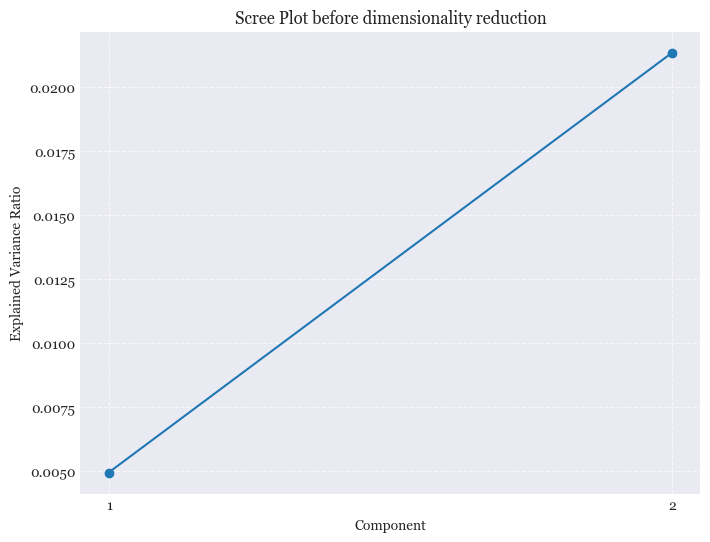

In [ ]:
# Plot the scree plot


plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Georgia'

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot before dimensionality reduction')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# number of components
n_components = 2

# Create a TruncatedSVD instance
svd = TruncatedSVD(n_components=n_components)

# Fit TruncatedSVD to the TF-IDF matrix and transform it to the reduced dimensionality
X_train_svd = svd.fit_transform(X_train_tfidf)

In [ ]:
svd = TruncatedSVD(n_components=X_train_tfidf.shape[1])
explained_variance_ratio = svd.fit(X_train_tfidf).explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

C:\Users\754179\AppData\Local\Temp\ipykernel_16980\1178509051.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


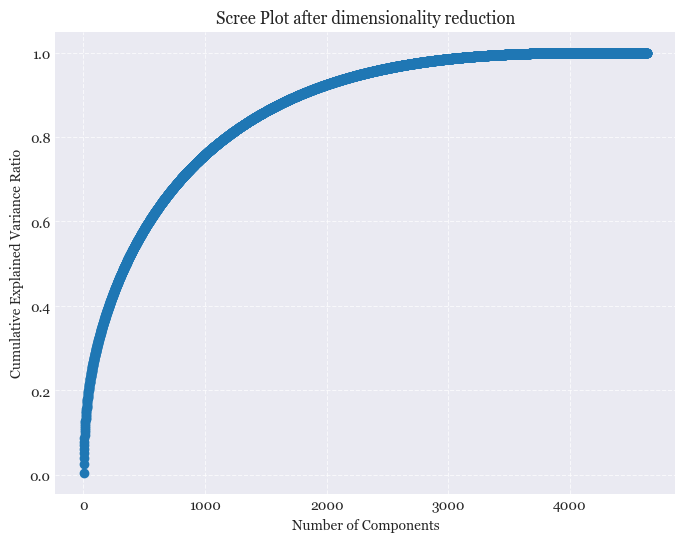

In [ ]:
# Plot the scree plot

plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Georgia'
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot after dimensionality reduction')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Classification using Traditinal Machine Learning**

### Classification with SVM

In [ ]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the SVM model
svm_model = SVC(kernel='linear', C=1.0, gamma='scale')


In [ ]:
# Train the model
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:

# Predictions
y_train_pred = svm_model.predict(X_train_tfidf)
y_test_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']

In [ ]:
# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']

In [ ]:
print("Train F1 Score:", train_f1_score)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

Train F1 Score: 0.9989210118474289
Train Precision: 0.9989231997808241
Train Recall: 0.9989214840379638


In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.9905086193441307
Test Precision: 0.9905147165806523
Test Recall: 0.9905172413793103


In [ ]:

# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:

# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()

In [ ]:
print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision    recall  f1-score      support
0              0.998409  1.000000  0.999204  3138.000000
1              1.000000  0.996662  0.998328  1498.000000
accuracy       0.998921  0.998921  0.998921     0.998921
macro avg      0.999205  0.998331  0.998766  4636.000000
weighted avg   0.998923  0.998921  0.998921  4636.000000


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score      support
0              0.990850  0.994751  0.992796   762.000000
1              0.989873  0.982412  0.986129   398.000000
accuracy       0.990517  0.990517  0.990517     0.990517
macro avg      0.990362  0.988581  0.989462  1160.000000
weighted avg   0.990515  0.990517  0.990509  1160.000000


In [ ]:

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

Text(0.5, 1.0, 'Train Confusion Matrix')

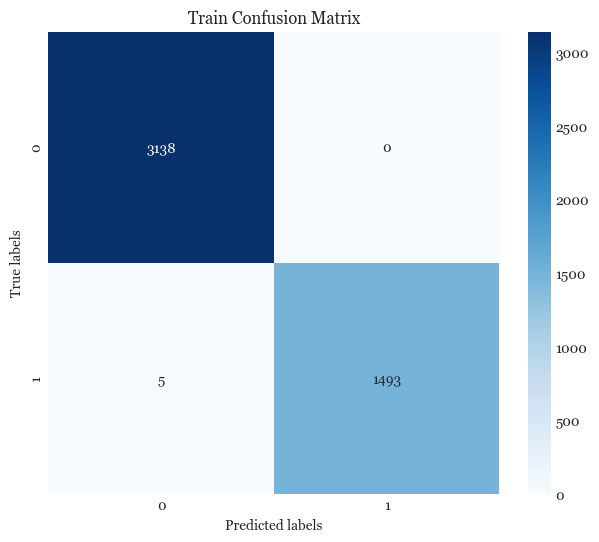

In [ ]:
# Display confusion matrices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Confusion Matrix')

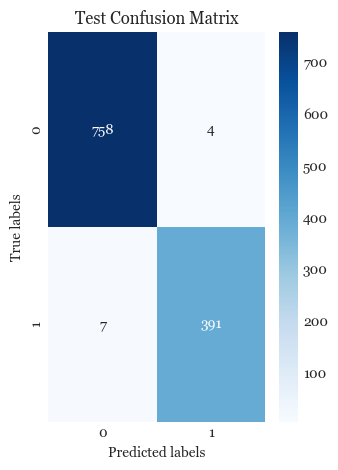

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Confusion Matrix')

plt.tight_layout()
plt.show()

##### Tuning C

In [ ]:
# Define the SVM model
svm_model = SVC(kernel='linear', C=0.01, gamma='scale')

In [ ]:
# Train the model
svm_model.fit(X_train_tfidf, y_train)

SVC(C=0.01, kernel='linear')

In [ ]:
# Predictions
y_train_pred = svm_model.predict(X_train_tfidf)
y_test_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']

# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']

In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.7084670135684921
Test Precision: 0.8194597952640074
Test Recall: 0.7560344827586207


In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()

In [ ]:
print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision    recall  f1-score      support
0              0.737139  1.000000  0.848682  3138.000000
1              1.000000  0.253004  0.403836  1498.000000
accuracy       0.758628  0.758628  0.758628     0.758628
macro avg      0.868569  0.626502  0.626259  4636.000000
weighted avg   0.822075  0.758628  0.704942  4636.000000


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score      support
0              0.729626  0.998688  0.843213   762.000000
1              0.991453  0.291457  0.450485   398.000000
accuracy       0.756034  0.756034  0.756034     0.756034
macro avg      0.860540  0.645072  0.646849  1160.000000
weighted avg   0.819460  0.756034  0.708467  1160.000000


##### Tuning gamma parameter

In [ ]:
# Define the SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Define the grid of parameters to search
param_grid = {'gamma': [0.0001]} #tried .001 earlier

In [ ]:
# Train the model
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [ ]:
# Predictions
y_train_pred = svm_model.predict(X_train_tfidf)
y_test_pred = svm_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()

In [ ]:
# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']

# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']

In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.9905086193441307
Test Precision: 0.9905147165806523
Test Recall: 0.9905172413793103


In [ ]:
print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision    recall  f1-score      support
0              0.998409  1.000000  0.999204  3138.000000
1              1.000000  0.996662  0.998328  1498.000000
accuracy       0.998921  0.998921  0.998921     0.998921
macro avg      0.999205  0.998331  0.998766  4636.000000
weighted avg   0.998923  0.998921  0.998921  4636.000000


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score      support
0              0.990850  0.994751  0.992796   762.000000
1              0.989873  0.982412  0.986129   398.000000
accuracy       0.990517  0.990517  0.990517     0.990517
macro avg      0.990362  0.988581  0.989462  1160.000000
weighted avg   0.990515  0.990517  0.990509  1160.000000


### Classification Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# assigning columns to X, y
X = classify_email['MESSAGE']
y = classify_email['CATEGORY']

In [ ]:

# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=10,
                                  class_weight='balanced',
                                  random_state=42)



In [ ]:
# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
# Predictions
y_train_pred = rf_model.predict(X_train_tfidf)
y_test_pred = rf_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:

# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']


In [ ]:
# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']


In [ ]:
print("Train F1 Score:", train_f1_score)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

Train F1 Score: 0.9676349051213519
Train Precision: 0.9693622259992137
Train Recall: 0.9680759275237274


In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.9538400341472287
Test Precision: 0.954924750876758
Test Recall: 0.9543103448275863


In [ ]:
# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()


In [ ]:

print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision    recall  f1-score      support
0              0.955793  0.999044  0.976940  3138.000000
1              0.997788  0.903204  0.948143  1498.000000
accuracy       0.968076  0.968076  0.968076     0.968076
macro avg      0.976790  0.951124  0.962541  4636.000000
weighted avg   0.969362  0.968076  0.967635  4636.000000


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score     support
0              0.947037  0.985564  0.965916   762.00000
1              0.970027  0.894472  0.930719   398.00000
accuracy       0.954310  0.954310  0.954310     0.95431
macro avg      0.958532  0.940018  0.948318  1160.00000
weighted avg   0.954925  0.954310  0.953840  1160.00000


In [ ]:
# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Train Confusion Matrix')

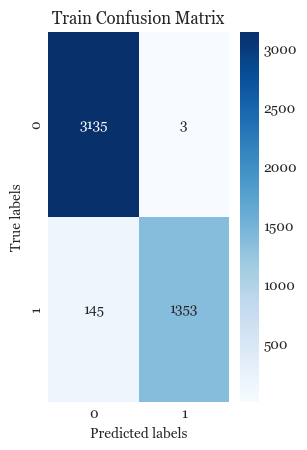

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Confusion Matrix')

Text(0.5, 1.0, 'Test Confusion Matrix')

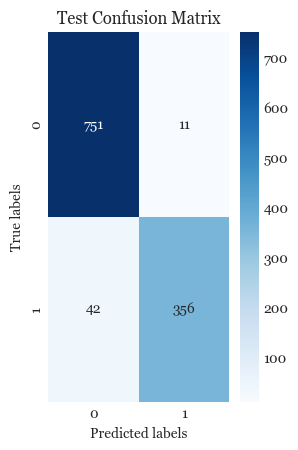

In [ ]:
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Confusion Matrix')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

##### n_estimator (number of trees)

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500,
                                  max_depth=10,
                                  class_weight='balanced',  # Set class_weight to 'balanced'
                                  random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                       random_state=42)

In [ ]:
# Predictions
y_train_pred = rf_model.predict(X_train_tfidf)
y_test_pred = rf_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']


In [ ]:
# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']

In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.9564996315469844
Test Precision: 0.9573705569384311
Test Recall: 0.9568965517241379


In [ ]:
# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()

In [ ]:
print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision    recall  f1-score      support
0              0.961350  0.998725  0.979681  3138.000000
1              0.997093  0.915888  0.954767  1498.000000
accuracy       0.971959  0.971959  0.971959     0.971959
macro avg      0.979221  0.957307  0.967224  4636.000000
weighted avg   0.972899  0.971959  0.971631  4636.000000


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score      support
0              0.950633  0.985564  0.967784   762.000000
1              0.970270  0.902010  0.934896   398.000000
accuracy       0.956897  0.956897  0.956897     0.956897
macro avg      0.960452  0.943787  0.951340  1160.000000
weighted avg   0.957371  0.956897  0.956500  1160.000000


##### Tuning Tree depth

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500,
                                  max_depth=100,
                                  class_weight='balanced',  # Set class_weight to 'balanced'
                                  random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=100, n_estimators=500,
                       random_state=42)

In [ ]:
# Predictions
y_train_pred = rf_model.predict(X_train_tfidf)
y_test_pred = rf_model.predict(X_test_tfidf)

In [ ]:
# Evaluate the model
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Classification report for train dataset
train_report = classification_report(y_train, y_train_pred, output_dict=True)

# Classification report for test dataset
test_report = classification_report(y_test, y_test_pred, output_dict=True)

In [ ]:
# Extract F1 score, precision, and recall for train dataset
train_f1_score = train_report['weighted avg']['f1-score']
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']

In [ ]:
# Extract F1 score, precision, and recall for test dataset
test_f1_score = test_report['weighted avg']['f1-score']
test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']

In [ ]:
print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test F1 Score: 0.9827161176538874
Test Precision: 0.982777911743429
Test Recall: 0.9827586206896551


In [ ]:
# Display classification reports
train_df = pd.DataFrame(train_report).transpose()
test_df = pd.DataFrame(test_report).transpose()

In [ ]:
print("Train Classification Report:")
print(train_df)

Train Classification Report:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0   3138.0
1                   1.0     1.0       1.0   1498.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4636.0
weighted avg        1.0     1.0       1.0   4636.0


In [ ]:
print("\nTest Classification Report:")
print(test_df)


Test Classification Report:
              precision    recall  f1-score      support
0              0.981818  0.992126  0.986945   762.000000
1              0.984615  0.964824  0.974619   398.000000
accuracy       0.982759  0.982759  0.982759     0.982759
macro avg      0.983217  0.978475  0.980782  1160.000000
weighted avg   0.982778  0.982759  0.982716  1160.000000


In [ ]:
# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Train Confusion Matrix')

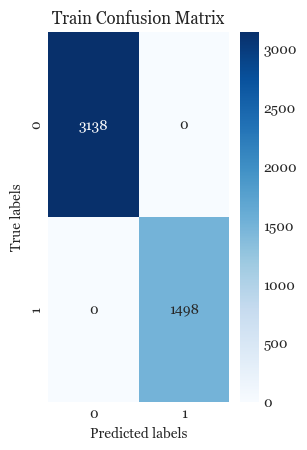

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Confusion Matrix')

Text(0.5, 1.0, 'Test Confusion Matrix')

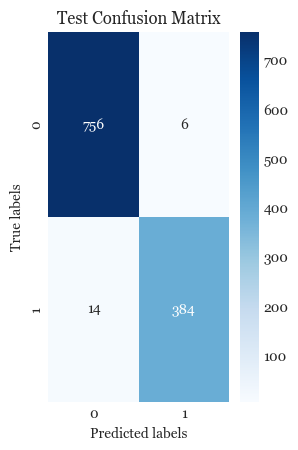

In [ ]:
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Test Confusion Matrix')

**Classisifcation using Deep Learning**

### Sentence embedding

In [ ]:
pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/138.0 kB ? eta -:--:--
     -------------------------------------- 138.0/138.0 kB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
   ---------------------------------------- 0.0/171.5 kB ? eta -:--:--
   --------------------------------------- 171.5/171.5 kB 10.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/401.2 kB ? eta -:--:--
   ---------------------------------------- 401.2/401.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   -------------------- ------------------- 4.7/9.0 MB 101.3 MB/s eta 0:00:01
   ---------------------------------------- 9.0/9.0 MB 96.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/172.0 kB ? eta -:--:--
   -------------------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sentence_transformers import SentenceTransformer


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sentence_transformers import SentenceTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
classify_email = pd.read_csv('Spam Email raw text for NLP.csv')

In [ ]:
# Select only 'CATEGORY' and 'MESSAGE' columns
classify_email = classify_email.loc[:, ['CATEGORY', 'MESSAGE']]

In [ ]:

X = classify_email['MESSAGE']
y = classify_email['CATEGORY']

In [ ]:
# Sentence embedding using Sentence Transformer
model_name = 'roberta-base-nli-mean-tokens'
embedder = SentenceTransformer(model_name)
X_embedded = embedder.encode(X, show_progress_bar=True)

C:\Users\754179\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Batches:   0%|          | 0/182 [00:00<?, ?it/s]

In [ ]:
import re

In [ ]:
# Define a function to remove punctuation, special characters
def clean_text(text):
    # Define the pattern for punctuation and special characters
    pattern = r'[,.;!?()"\'&$>=_/...%+<\-]'
    # Replace the pattern with an empty string
    cleaned_text = re.sub(pattern, '', text)
    # Remove consecutive newline characters
    cleaned_text = re.sub(r'\n+', '\n', cleaned_text)
    # Remove '\n]\n]'
    cleaned_text = cleaned_text.replace('\n]\n]', '')
    return cleaned_text

In [ ]:

# Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(clean_text)

In [ ]:

# Convert 'MESSAGE' column to lowercase
classify_email['MESSAGE'] = classify_email['MESSAGE'].str.lower()

In [ ]:
pip install pydantic

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import spacy

In [ ]:
import en_core_web_sm

In [ ]:
# Load the 'en_core_web_sm' model
nlp = spacy.load("en_core_web_sm")

In [ ]:

# Function to remove stopwords from text
def remove_stopwords(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Filter out tokens that are not stopwords
    filtered_text = " ".join([token.text for token in doc if not token.is_stop])
    return filtered_text


In [ ]:

 #Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(remove_stopwords)

In [ ]:
# Function to lemmatize a text
def lemmatize_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Lemmatize each token in the document and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    return lemmatized_text

In [ ]:
# Apply the function to the 'MESSAGE' column
classify_email['MESSAGE'] = classify_email['MESSAGE'].apply(lemmatize_text)

In [ ]:
# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=42)

In [ ]:
X_embedded = X_embedded.reshape(-1, 1, X_embedded.shape[1])

In [ ]:
from tensorflow.keras.layers import Reshape

### Classification using GRU

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Clear the TensorFlow default graph
tf.keras.backend.clear_session()

In [ ]:
# Define the model
model = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
37/37 [==============================] - 3s 25ms/step - loss: 0.3164 - accuracy: 0.8632 - val_loss: 0.1922 - val_accuracy: 0.9293
Epoch 2/10
37/37 [==============================] - 0s 10ms/step - loss: 0.1524 - accuracy: 0.9424 - val_loss: 0.1497 - val_accuracy: 0.9379
Epoch 3/10
37/37 [==============================] - 0s 9ms/step - loss: 0.1146 - accuracy: 0.9564 - val_loss: 0.1310 - val_accuracy: 0.9526
Epoch 4/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0911 - accuracy: 0.9672 - val_loss: 0.1265 - val_accuracy: 0.9560
Epoch 5/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0757 - accuracy: 0.9728 - val_loss: 0.1117 - val_accuracy: 0.9595
Epoch 6/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0759 - accuracy: 0.9724 - val_loss: 0.1093 - val_accuracy: 0.9586
Epoch 7/10
37/37 [==============================] - 0s 10ms/step - loss: 0.0602 - accuracy: 0.9817 - val_loss: 0.1030 - val_accuracy: 0.9664
Epoch 8/10
37/

In [ ]:
# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               459264    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 459393 (1.75 MB)
Trainable params: 459393 (1.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Convert probabilities to classes
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 0.9936518543267625, Precision: 0.9946488294314382, Recall: 0.992656875834446


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.9525, Precision: 0.9477611940298507, Recall: 0.957286432160804


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
train_report = classification_report(y_train, y_train_pred, output_dict=True)
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3138
           1       0.99      0.99      0.99      1498

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636



In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       762
           1       0.95      0.96      0.95       398

    accuracy                           0.97      1160
   macro avg       0.96      0.96      0.96      1160
weighted avg       0.97      0.97      0.97      1160



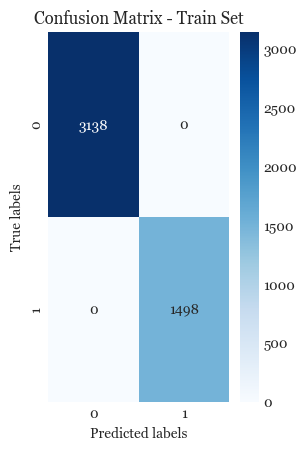

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

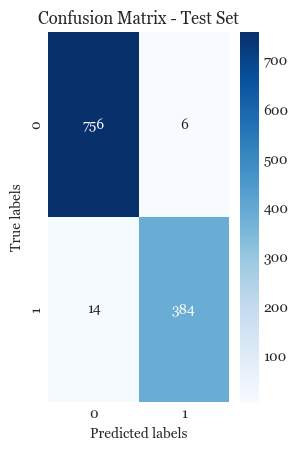

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

##### Tuning batch size

In [ ]:
# Define the model
model = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=256, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
19/19 [==============================] - 0s 18ms/step - loss: 0.0262 - accuracy: 0.9961 - val_loss: 0.0923 - val_accuracy: 0.9707
Epoch 2/10
19/19 [==============================] - 0s 15ms/step - loss: 0.0234 - accuracy: 0.9950 - val_loss: 0.0889 - val_accuracy: 0.9733
Epoch 3/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0204 - accuracy: 0.9963 - val_loss: 0.0918 - val_accuracy: 0.9698
Epoch 4/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0179 - accuracy: 0.9976 - val_loss: 0.0960 - val_accuracy: 0.9707
Epoch 5/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0169 - accuracy: 0.9976 - val_loss: 0.0940 - val_accuracy: 0.9733
Epoch 6/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0145 - accuracy: 0.9981 - val_loss: 0.0876 - val_accuracy: 0.9750
Epoch 7/10
19/19 [==============================] - 0s 14ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.0902 - val_accuracy: 0.9750
Epoch 8/10
19

In [ ]:

# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Convert probabilities to classes
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 0.9986639946559787, Precision: 0.9993315508021391, Recall: 0.9979973297730307


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.9649122807017544, Precision: 0.9625, Recall: 0.9673366834170855


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
train_report = classification_report(y_train, y_train_pred, output_dict=True)
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3138
           1       1.00      1.00      1.00      1498

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636



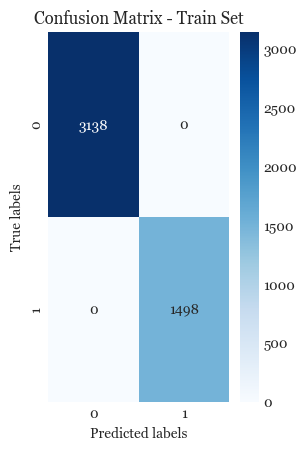

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       762
           1       0.96      0.97      0.96       398

    accuracy                           0.98      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.98      0.98      0.98      1160



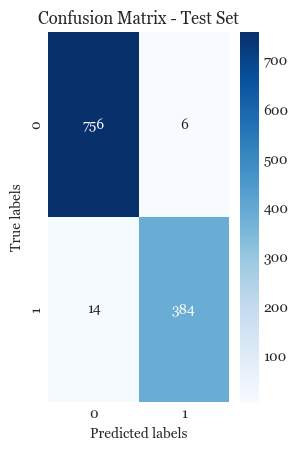

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

##### Tuning number of epochs

In [ ]:
# Define the model
model = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=256, validation_data=(X_test_reshaped, y_test))

Epoch 1/100
19/19 [==============================] - 3s 39ms/step - loss: 0.3649 - accuracy: 0.8356 - val_loss: 0.2494 - val_accuracy: 0.9043
Epoch 2/100
19/19 [==============================] - 0s 13ms/step - loss: 0.1975 - accuracy: 0.9243 - val_loss: 0.1770 - val_accuracy: 0.9319
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 0.1447 - accuracy: 0.9431 - val_loss: 0.1642 - val_accuracy: 0.9345
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.1224 - accuracy: 0.9534 - val_loss: 0.1489 - val_accuracy: 0.9440
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.1043 - accuracy: 0.9620 - val_loss: 0.1291 - val_accuracy: 0.9483
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0929 - accuracy: 0.9685 - val_loss: 0.1226 - val_accuracy: 0.9517
Epoch 7/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.1138 - val_accuracy: 0.9560
Epoch 

In [ ]:
# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Convert probabilities to classes
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 1.0, Precision: 1.0, Recall: 1.0


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.9661229611041405, Precision: 0.9649122807017544, Recall: 0.9673366834170855


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
train_report = classification_report(y_train, y_train_pred, output_dict=True)
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3138
           1       1.00      1.00      1.00      1498

    accuracy                           1.00      4636
   macro avg       1.00      1.00      1.00      4636
weighted avg       1.00      1.00      1.00      4636



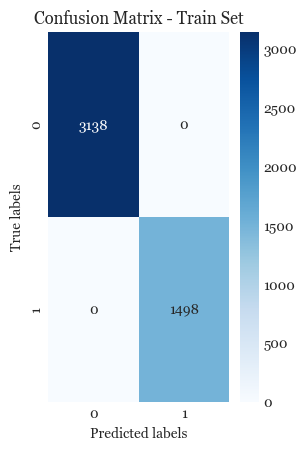

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       762
           1       0.96      0.97      0.97       398

    accuracy                           0.98      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.98      0.98      0.98      1160



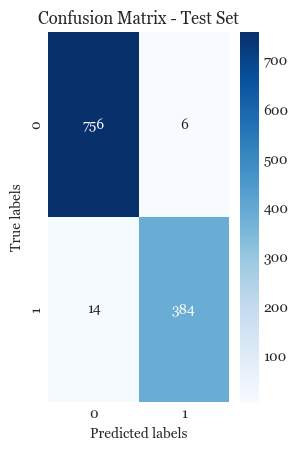

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

### Classification with LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Reshape X_train to add an additional dimension for the number of time steps
X_train_reshaped = np.expand_dims(X_train, axis=1)


In [ ]:
# Define and compile the model
model = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Display model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1, 128)            459264    
                                                                 
 dropout_5 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_6 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 508737 (1.94 MB)
Trainable params: 508737 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
116/116 [==============================] - 6s 16ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.2490 - val_accuracy: 0.9644
Epoch 2/10
116/116 [==============================] - 1s 9ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.2564 - val_accuracy: 0.9666
Epoch 3/10
116/116 [==============================] - 1s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.3159 - val_accuracy: 0.9644
Epoch 4/10
116/116 [==============================] - 1s 9ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.2546 - val_accuracy: 0.9655
Epoch 5/10
116/116 [==============================] - 1s 9ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.2351 - val_accuracy: 0.9655
Epoch 6/10
116/116 [==============================] - 1s 9ms/step - loss: 4.7925e-04 - accuracy: 1.0000 - val_loss: 0.2422 - val_accuracy: 0.9688
Epoch 7/10
116/116 [==============================] - 1s 9ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.2415 - val_accuracy: 0.9634
E

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:

# Convert probabilities to classes using a threshold (e.g., 0.5)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 0.9886515353805073, Precision: 0.9886515353805073, Recall: 0.9886515353805073


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.946450809464508, Precision: 0.9382716049382716, Recall: 0.9547738693467337


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3138
           1       0.99      0.99      0.99      1498

    accuracy                           0.99      4636
   macro avg       0.99      0.99      0.99      4636
weighted avg       0.99      0.99      0.99      4636



In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       762
           1       0.94      0.95      0.95       398

    accuracy                           0.96      1160
   macro avg       0.96      0.96      0.96      1160
weighted avg       0.96      0.96      0.96      1160



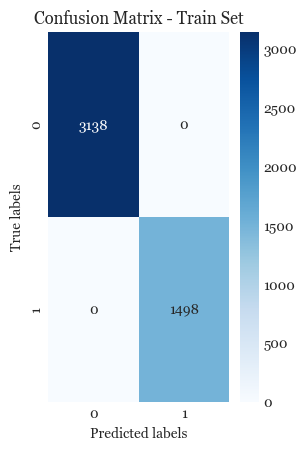

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

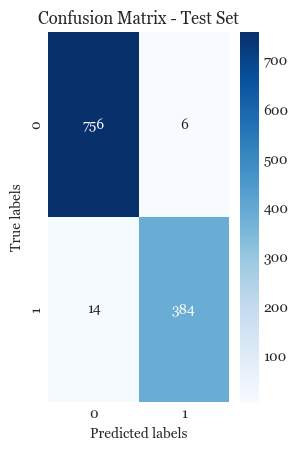

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

##### Tuning number of epochs

In [ ]:
# Define and compile the model
model = Sequential([
    LSTM(128, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
 #Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
116/116 [==============================] - 4s 12ms/step - loss: 0.2338 - accuracy: 0.9045 - val_loss: 0.1852 - val_accuracy: 0.9256
Epoch 2/150
116/116 [==============================] - 1s 7ms/step - loss: 0.1197 - accuracy: 0.9536 - val_loss: 0.1475 - val_accuracy: 0.9483
Epoch 3/150
116/116 [==============================] - 1s 8ms/step - loss: 0.0888 - accuracy: 0.9644 - val_loss: 0.1298 - val_accuracy: 0.9569
Epoch 4/150
116/116 [==============================] - 1s 8ms/step - loss: 0.0692 - accuracy: 0.9738 - val_loss: 0.1603 - val_accuracy: 0.9440
Epoch 5/150
116/116 [==============================] - 1s 7ms/step - loss: 0.0545 - accuracy: 0.9819 - val_loss: 0.1426 - val_accuracy: 0.9580
Epoch 6/150
116/116 [==============================] - 1s 8ms/step - loss: 0.0474 - accuracy: 0.9827 - val_loss: 0.1308 - val_accuracy: 0.9601
Epoch 7/150
116/116 [==============================] - 1s 7ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.1181 - val_accuracy: 0.965

In [ ]:
# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Convert probabilities to classes
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 0.9913101604278074, Precision: 0.9926372155287818, Recall: 0.9899866488651535


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.9564134495641344, Precision: 0.9481481481481482, Recall: 0.964824120603015


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3138
           1       0.99      0.99      0.99      1498

    accuracy                           0.99      4636
   macro avg       0.99      0.99      0.99      4636
weighted avg       0.99      0.99      0.99      4636



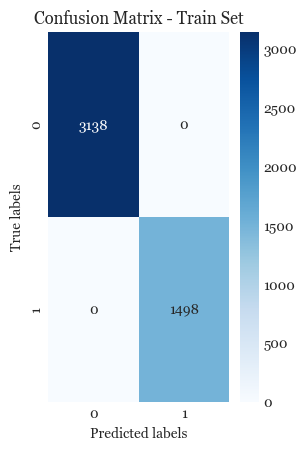

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       762
           1       0.95      0.96      0.96       398

    accuracy                           0.97      1160
   macro avg       0.96      0.97      0.97      1160
weighted avg       0.97      0.97      0.97      1160



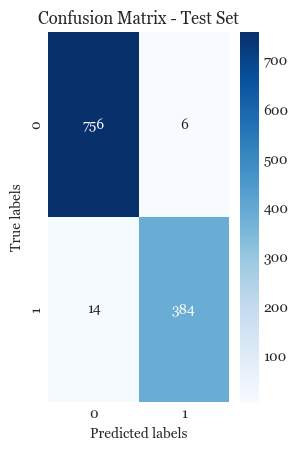

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()

##### Tuning the number of layers

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define and compile the model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    LSTM(64),  # Adding one more LSTM layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 128)            459264    
                                                                 
 dropout_8 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 508737 (1.94 MB)
Trainable params: 508737 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
116/116 [==============================] - 6s 16ms/step - loss: 0.2467 - accuracy: 0.9045 - val_loss: 0.1770 - val_accuracy: 0.9300
Epoch 2/150
116/116 [==============================] - 1s 9ms/step - loss: 0.1340 - accuracy: 0.9463 - val_loss: 0.1859 - val_accuracy: 0.9332
Epoch 3/150
116/116 [==============================] - 1s 9ms/step - loss: 0.0966 - accuracy: 0.9628 - val_loss: 0.1329 - val_accuracy: 0.9504
Epoch 4/150
116/116 [==============================] - 1s 10ms/step - loss: 0.0805 - accuracy: 0.9679 - val_loss: 0.1424 - val_accuracy: 0.9515
Epoch 5/150
116/116 [==============================] - 1s 9ms/step - loss: 0.0602 - accuracy: 0.9776 - val_loss: 0.1195 - val_accuracy: 0.9688
Epoch 6/150
116/116 [==============================] - 1s 9ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.1388 - val_accuracy: 0.9580
Epoch 7/150
116/116 [==============================] - 1s 9ms/step - loss: 0.0375 - accuracy: 0.9854 - val_loss: 0.1218 - val_accuracy: 0.96

In [ ]:
# Generate predictions for train and test sets
y_train_pred_prob = model.predict(X_train_reshaped)
y_test_pred_prob = model.predict(X_test_reshaped)

37/37 [==============================] - 0s 2ms/step


In [ ]:
# Convert probabilities to classes
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

In [ ]:
# Calculate F1 score, precision, and recall for train and test sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [ ]:
print("Train Set Evaluation:")
print(f"F1 Score: {train_f1}, Precision: {train_precision}, Recall: {train_recall}")

Train Set Evaluation:
F1 Score: 0.9892689470154258, Precision: 0.9939353099730458, Recall: 0.9846461949265688


In [ ]:
print("\nTest Set Evaluation:")
print(f"F1 Score: {test_f1}, Precision: {test_precision}, Recall: {test_recall}")


Test Set Evaluation:
F1 Score: 0.9593908629441623, Precision: 0.9692307692307692, Recall: 0.949748743718593


In [ ]:
# Classification report for train set
print("\nClassification Report - Train Set:")
print(classification_report(y_train, y_train_pred))


Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3138
           1       0.99      0.98      0.99      1498

    accuracy                           0.99      4636
   macro avg       0.99      0.99      0.99      4636
weighted avg       0.99      0.99      0.99      4636



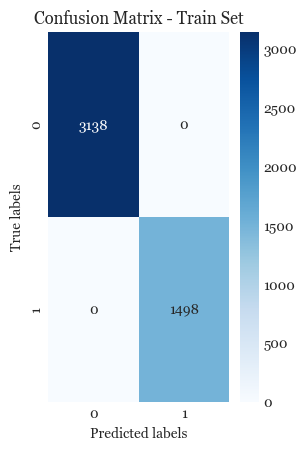

In [ ]:
# Confusion matrix for train set
plt.subplot(1, 2, 1)
sns.heatmap(train_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [ ]:
# Classification report for test set
print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       762
           1       0.97      0.95      0.96       398

    accuracy                           0.97      1160
   macro avg       0.97      0.97      0.97      1160
weighted avg       0.97      0.97      0.97      1160



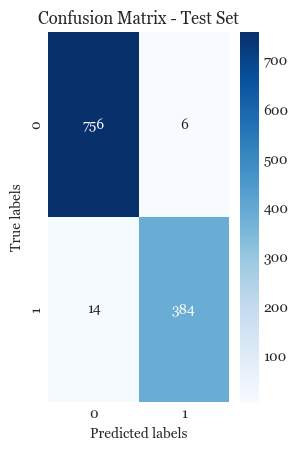

In [ ]:
# Confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()